# Machine Learning Classification Project

### Link : http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

![alt text](https://blog.vimarketingandbranding.com/hs-fs/hubfs/iStock_000032568274Large-422859-edited.jpg?width=1500&name=iStock_000032568274Large-422859-edited.jpg)

<pre>
Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


</pre>

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [169]:
df=pd.read_csv("Class_ds.csv")

In [170]:
df.head()

age          job   marital          education default housing loan  \
0   51  blue-collar   married           basic.9y      no     yes  yes   
1   31       admin.  divorced        high.school      no      no   no   
2   32  blue-collar  divorced           basic.9y      no      no   no   
3   36       admin.   married  university.degree      no     yes   no   
4   43       admin.   married        high.school      no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         wed  ...         2    999         0  nonexistent   
1  telephone   may         mon  ...         2    999         0  nonexistent   
2  telephone   may         wed  ...         1    999         0  nonexistent   
3   cellular   aug         wed  ...         3    999         0  nonexistent   
4   cellular   jul         mon  ...         2    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.858       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.858       5191.0  no  
3          1.4          93.444          -36.1      4.964       5228.1  no  
4          1.4          93.918          -42.7      4.960       5228.1  no  

[5 rows x 21 columns]

In [171]:
df.shape

(20594, 21)

In [172]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             20594 non-null  int64  
 1   job             20233 non-null  object 
 2   marital         20225 non-null  object 
 3   education       20594 non-null  object 
 4   default         20594 non-null  object 
 5   housing         20594 non-null  object 
 6   loan            20211 non-null  object 
 7   contact         20594 non-null  object 
 8   month           20594 non-null  object 
 9   day_of_week     20594 non-null  object 
 10  duration        20594 non-null  int64  
 11  campaign        20594 non-null  int64  
 12  pdays           20594 non-null  int64  
 13  previous        20594 non-null  int64  
 14  poutcome        20594 non-null  object 
 15  emp.var.rate    20594 non-null  float64
 16  cons.price.idx  20594 non-null  float64
 17  cons.conf.idx   2

In [173]:
# looking for missing values
df.isnull().any()


age               False
job                True
marital            True
education         False
default           False
housing           False
loan               True
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m          True
nr.employed       False
y                 False
dtype: bool

In [174]:
# looks like job,marital,loan and euribor3m has missing values
# lets check num of missing values in each column
a= ['job','marital','loan','euribor3m']
for values in a:
    print("Missing values in %s is equal to %s" % (values,df[values].isnull().sum()))

Missing values in job is equal to 361
Missing values in marital is equal to 369
Missing values in loan is equal to 383
Missing values in euribor3m is equal to 399


In [175]:
# to handle missing values in numerical column we will replace the value with median of the column
# Replace using median 
median = df['euribor3m'].median()
df['euribor3m'].fillna(median, inplace=True)
df['euribor3m'].isnull().sum()

0

#### To handle missing values in each categorical column we are usign the frequency substitution thereby substituting the values with max frequency value

In [176]:
# so  to check frequency we do some seasborn plots

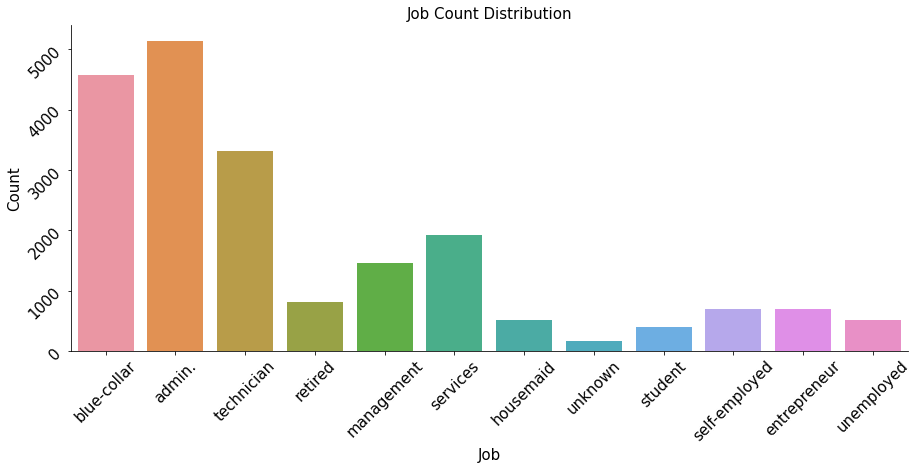

In [177]:
#we have 3 columns of type object and another column of type float which has missing values
# What kind of jobs clients of this bank have
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15,rotation=45)
sns.despine()

In [178]:
# replacing missing values by the admin as it has the highest frequency in this column
df['job'].fillna('admin.', inplace=True)
df['job'].isnull().sum()

0

#### also to check the number of unknowns in marital status column with respect to other categorical values

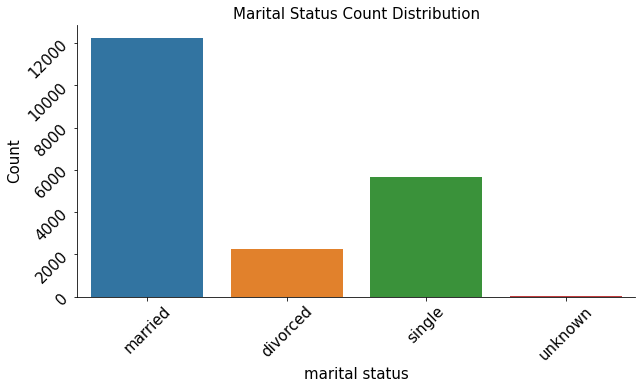

In [179]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = df)
ax.set_xlabel('marital status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Status Count Distribution', fontsize=15)
ax.tick_params(labelsize=15,rotation=45)
sns.despine()

In [180]:
# replacing missing values by the married as it has the highest frequency in this column
df['marital'].fillna('married', inplace=True)
df['marital'].isnull().sum()

0

#### to check the number of unknowns in Loan column with respect to other categorical values

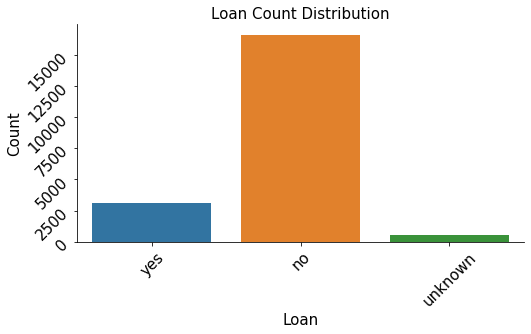

In [181]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)
sns.countplot(x = 'loan', data = df)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan Count Distribution', fontsize=15)
ax.tick_params(labelsize=15,rotation=45)
sns.despine()

In [182]:
# replacing missing values by the 'no' as it has the highest frequency in this column
df['loan'].fillna('no', inplace=True)
df['loan'].isnull().sum()

0

### We have handled all the missing values

#### bifurcating datasets to seperate different types of attributes to help and understand them better

In [183]:
#bank client data set
df_client=df.iloc[:,0:7]
df_client.head()

age          job   marital          education default housing loan
0   51  blue-collar   married           basic.9y      no     yes  yes
1   31       admin.  divorced        high.school      no      no   no
2   32  blue-collar  divorced           basic.9y      no      no   no
3   36       admin.   married  university.degree      no     yes   no
4   43       admin.   married        high.school      no     yes   no

In [184]:
#checking how many unique values each column related to client has
for r in df_client.columns:
    print("type of %s -->"%r,df_client[r].unique(),'\n')

type of age --&gt; [51 31 32 36 43 38 29 53 37 28 49 35 52 79 48 41 34 40 92 45 25 57 33 42
 27 56 30 50 39 65 47 19 59 69 44 46 24 26 54 22 58 78 60 66 72 23 61 80
 98 71 21 70 55 76 20 63 77 64 68 81 75 73 82 88 85 18 62 84 74 83 67 17
 87 91 94 86 89] 

type of job --&gt; [&#39;blue-collar&#39; &#39;admin.&#39; &#39;technician&#39; &#39;retired&#39; &#39;management&#39; &#39;services&#39;
 &#39;housemaid&#39; &#39;unknown&#39; &#39;student&#39; &#39;self-employed&#39; &#39;entrepreneur&#39;
 &#39;unemployed&#39;] 

type of marital --&gt; [&#39;married&#39; &#39;divorced&#39; &#39;single&#39; &#39;unknown&#39;] 

type of education --&gt; [&#39;basic.9y&#39; &#39;high.school&#39; &#39;university.degree&#39; &#39;professional.course&#39;
 &#39;basic.4y&#39; &#39;unknown&#39; &#39;basic.6y&#39; &#39;illiterate&#39;] 

type of default --&gt; [&#39;no&#39; &#39;unknown&#39; &#39;yes&#39;] 

type of housing --&gt; [&#39;yes&#39; &#39;no&#39; &#39;unknown&#39;] 

type of loan --&gt; [&#39;y

## Feature : AGE

In [185]:
# Inspecting Age column in the client dataframe
print('Min age: ', df_client['age'].max())
print('Max age: ', df_client['age'].min())
print('Mean age: ',round(df_client['age'].mean(),2))


Min age:  98
Max age:  17
Mean age:  39.98


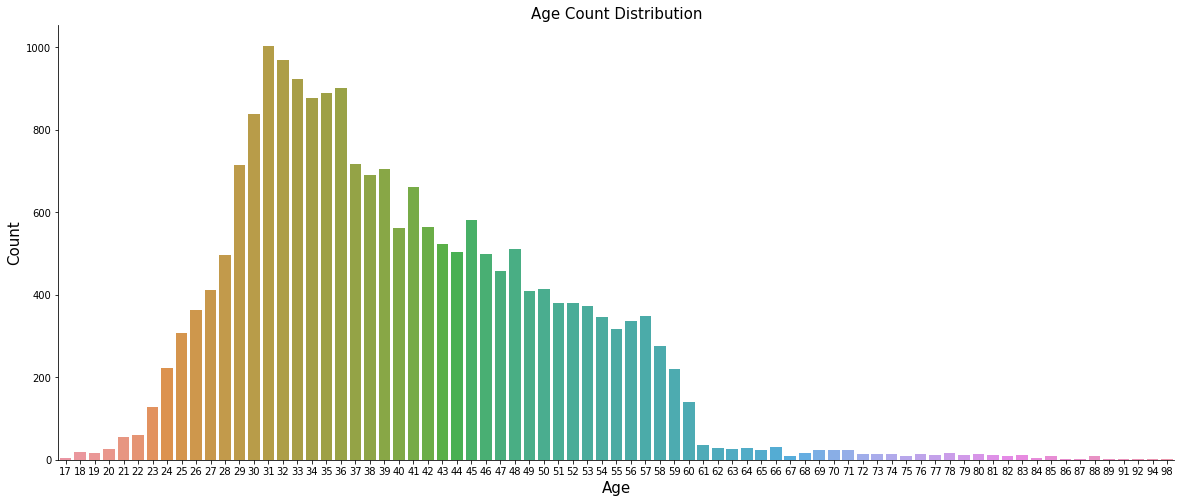

In [186]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

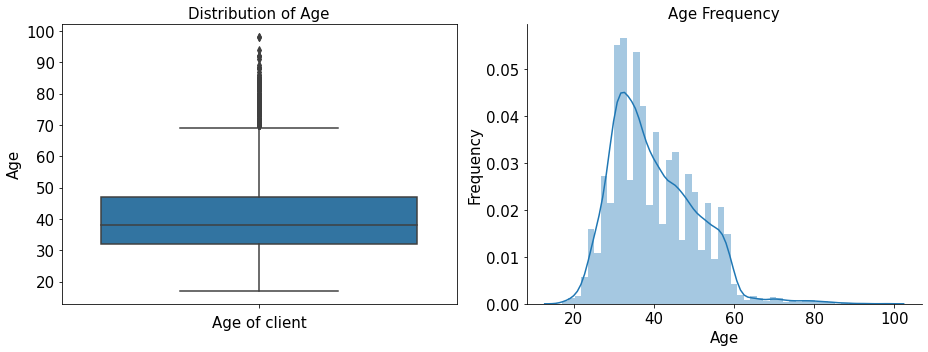

In [187]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = df_client, orient = 'v', ax = ax1)
ax1.set_xlabel('Age of client', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of Age', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_client['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Frequency', fontsize=15)
ax2.set_title('Age Frequency', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [188]:
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Age of client above : ', df_client['age'].quantile(q = 0.75) + 
                      1.5*(df_client['age'].quantile(q = 0.75) - df_client['age'].quantile(q = 0.25)), 'are outliers')

print('Numerber of outliers: ', df_client[df_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(df_client))
#Outliers in %
print('Percentage of Outliers in Age column is :', round(df_client[df_client['age'] > 69.6]['age'].count()*100/len(df_client),2), '%')

Age of client above :  69.5 are outliers
Numerber of outliers:  234
Number of clients:  20594
Percentage of Outliers in Age column is : 1.14 %


In [189]:
df.shape

(20594, 21)

In [190]:
#droppping rows having outliers
ind=(df_client[df_client['age'] > 69.6]['age']).index
df.drop(index=ind,inplace=True)
df.shape

(20360, 21)

### count plot of All Features possible

&lt;AxesSubplot:xlabel=&#39;poutcome&#39;, ylabel=&#39;count&#39;&gt;

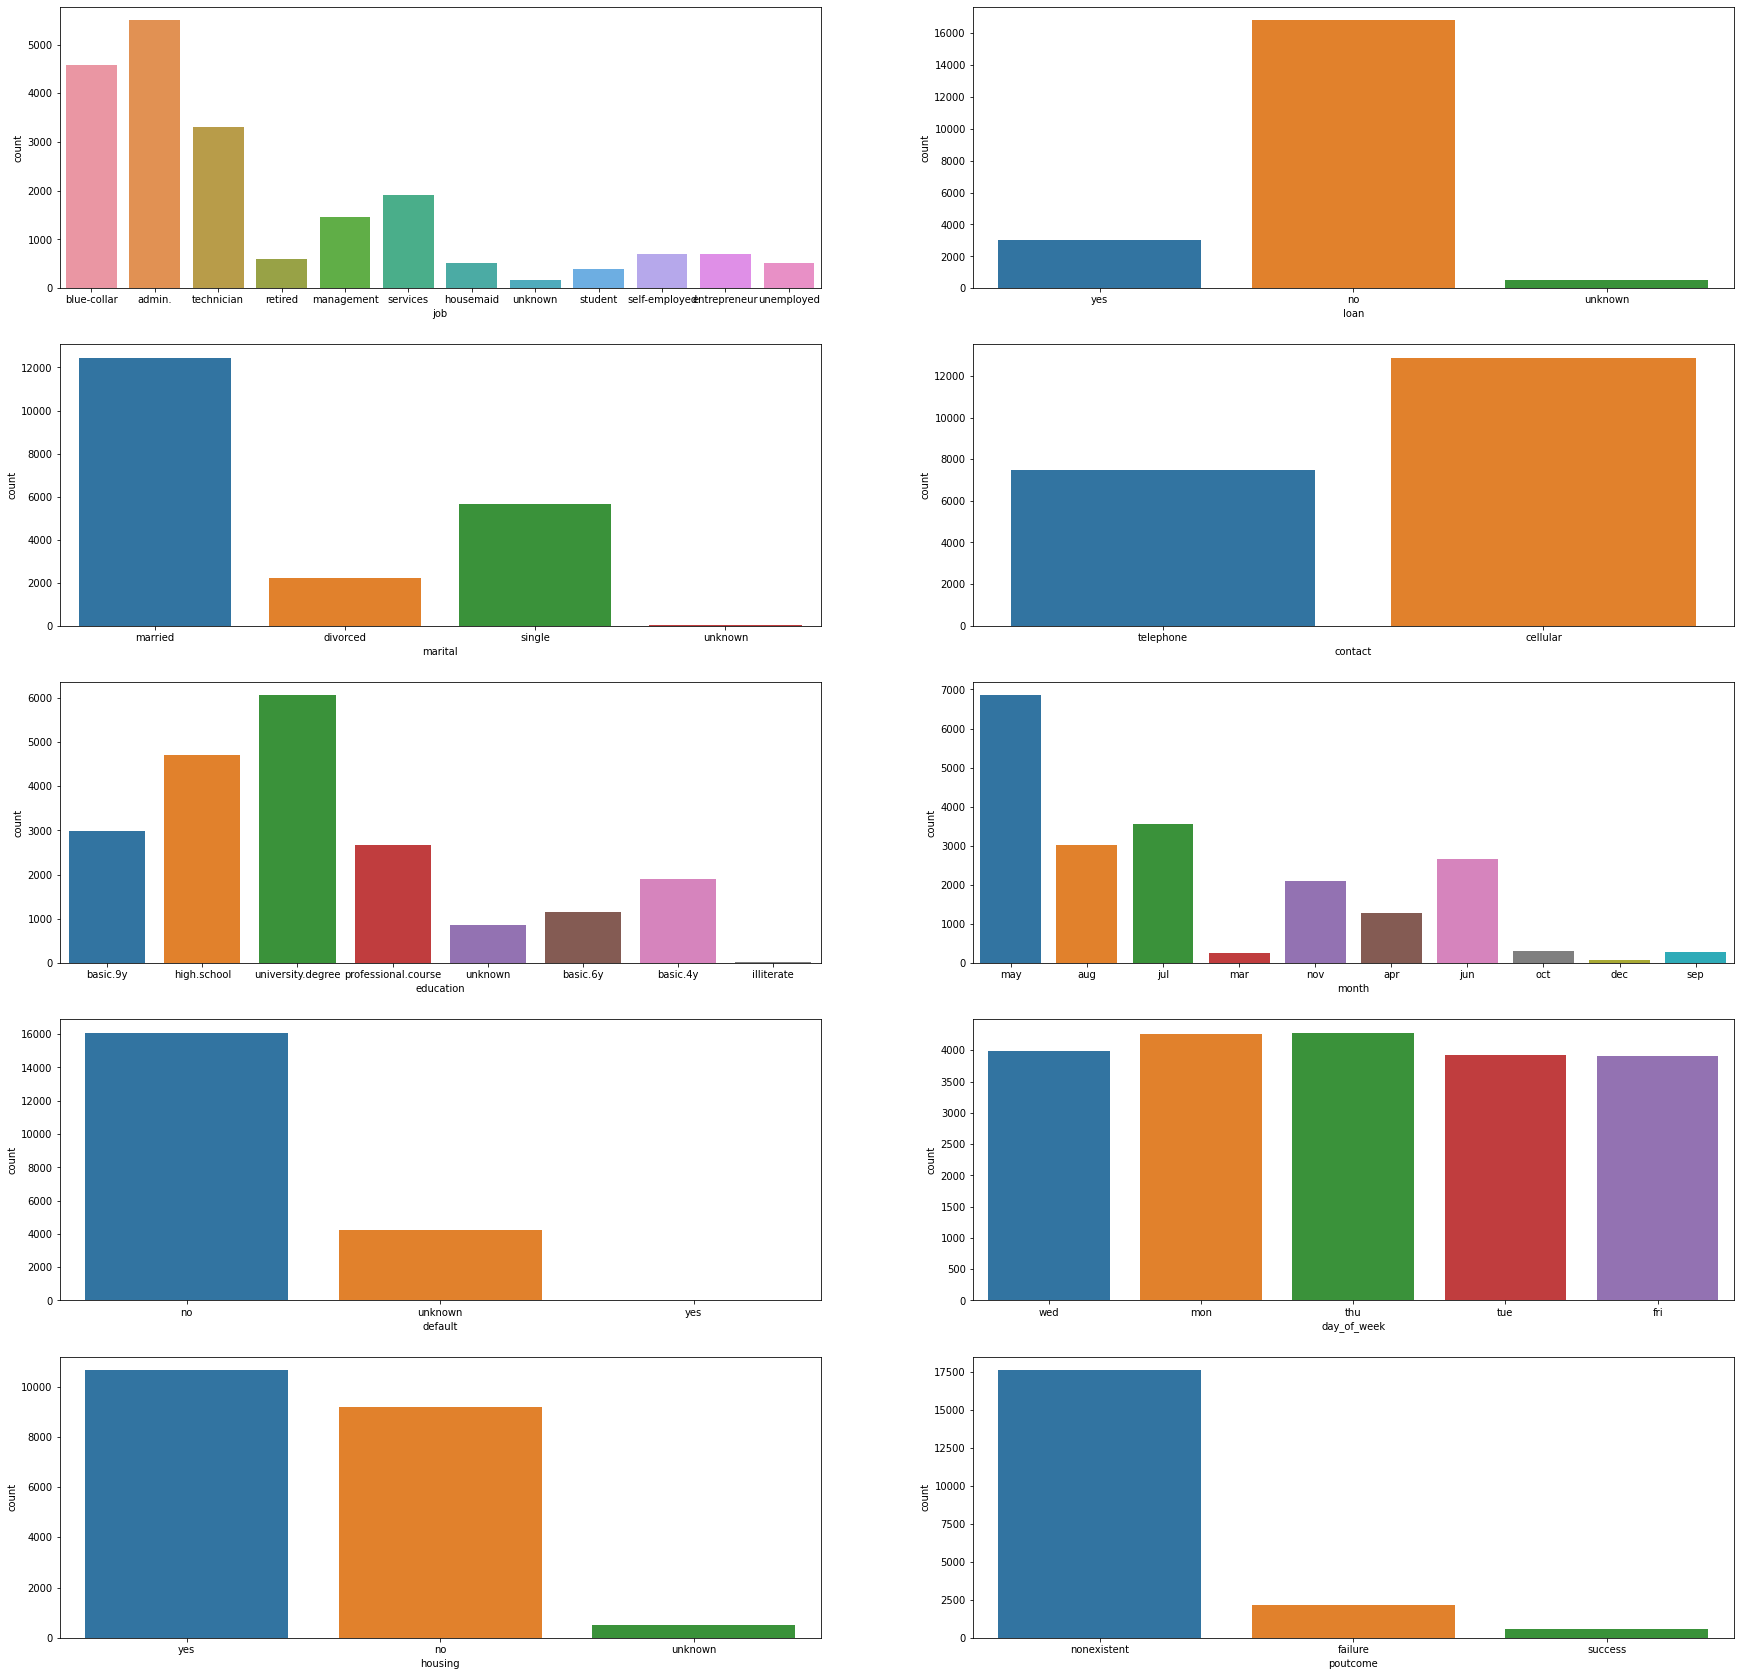

In [191]:
# we do count plot of all the object variable to have a better understanding about the nature of the client and its effect on term depostie decision
f, axes = plt.subplots(5, 2)
fig = plt.gcf()
fig.set_size_inches(30,30)

sns.countplot(x='job', data=df, ax=axes[0,0])
sns.countplot(x='marital', data=df, ax=axes[1,0])
sns.countplot(x='education', data=df, ax=axes[2,0])
sns.countplot(x='default', data=df, ax=axes[3,0])
sns.countplot(x='housing', data=df, ax=axes[4,0])
sns.countplot(x='loan', data=df, ax=axes[0,1])
sns.countplot(x='contact', data=df, ax=axes[1,1])
sns.countplot(x='month', data=df, ax=axes[2,1])
sns.countplot(x='day_of_week', data=df, ax=axes[3,1])
sns.countplot(x='poutcome', data=df, ax=axes[4,1])


#### we can see that by poutcome that most of the clients in this data set were not part of previous marketing campaigns
#### housing is equally divided between clients in this data set
#### most of the client who were target never defaulted
#### day_of_week doesnt look like playing important role here as it is fairly equally divided hence we need to analyze this more w.r.t to target variable=
#### having loan, job and marital status of the client may play more important roles

## feature : Duration 

In [192]:
df['duration'].describe()

count    20360.000000
mean       257.929568
std        259.393665
min          0.000000
25%        102.000000
50%        179.000000
75%        317.000000
max       4199.000000
Name: duration, dtype: float64

&lt;AxesSubplot:xlabel=&#39;y&#39;&gt;

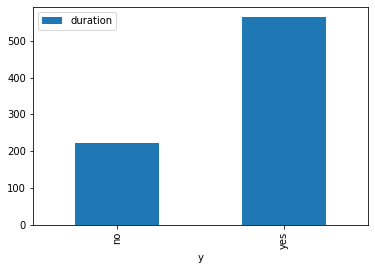

In [193]:
# here we want to check that for increase in duration of last contact do the chances of saying yes increases or not.

df[['duration','y']].groupby('y').mean().plot(kind='bar')
#difference in mean shows that for high duration there will be mostly a positive response


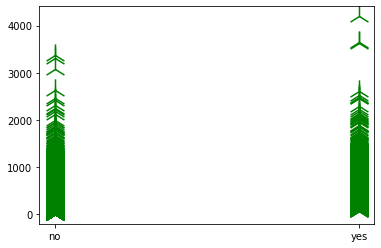

In [194]:
plt.scatter(df['y'],df['duration'],color='green',marker='2',s=500)
plt.show()

&lt;AxesSubplot:xlabel=&#39;duration&#39;&gt;

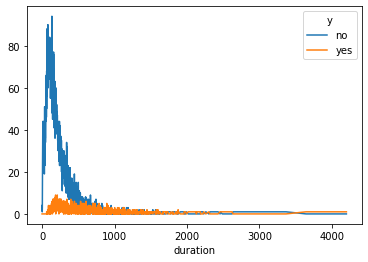

In [195]:
pd.crosstab(df['duration'],df['y']).plot(kind='line')

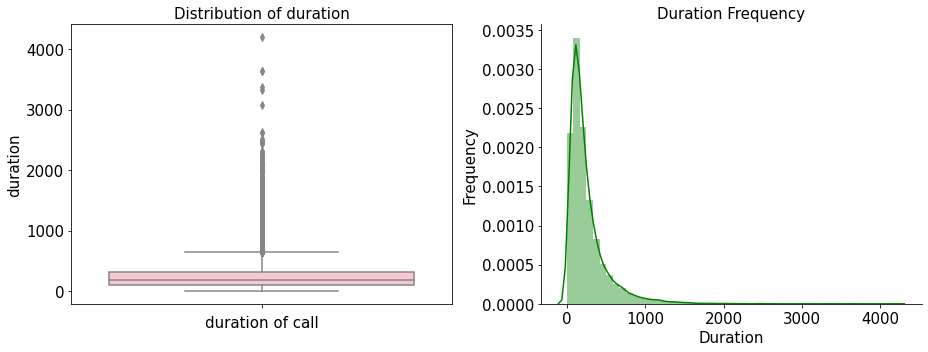

In [196]:
fig, (ax3, ax4) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = df, orient = 'v', ax = ax3,color='pink')
ax3.set_xlabel('duration of call', fontsize=15)
ax3.set_ylabel('duration', fontsize=15)
ax3.set_title('Distribution of duration', fontsize=15)
ax3.tick_params(labelsize=15)

sns.distplot(df['duration'], ax = ax4, color ='green')
sns.despine(ax = ax4)
ax4.set_xlabel('Duration', fontsize=15)
ax4.set_ylabel('Frequency', fontsize=15)
ax4.set_title('Duration Frequency', fontsize=15)
ax4.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## feature : marital status

In [197]:
marital_s = pd.crosstab(df['marital'], df['y'])
marital_s

y            no   yes
marital              
divorced   1983   215
married   11272  1179
single     4891   777
unknown      36     7

Text(0, 0.5, &#39;Yes/No Rate&#39;)

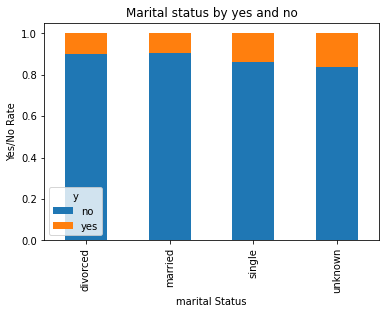

In [198]:
# Normalize the cross tab to sum to 1:
ms_t = marital_s.div(marital_s.sum(1).astype(float), axis=0)

ms_t.plot(kind='bar', 
                   stacked=True, 
                   title='Marital status by yes and no')
plt.xlabel('marital Status')
plt.ylabel('Yes/No Rate')

## Target variable : y

(array([18182.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2178.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 &lt;BarContainer object of 10 artists&gt;)

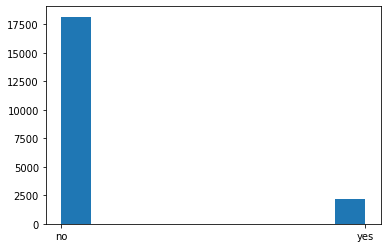

In [199]:
plt.hist(df['y'])

### By the plot above we can see how imbalanced the data set is for training the model: so we definetely take this into account that our model is trained in highly imbalanced dataset which may be the business case

## feature : Housing

In [200]:
## Its looks fairley evenly distributed in all categories then we can drop it before modelling

Text(0, 0.5, &#39;Yes/No Rate&#39;)

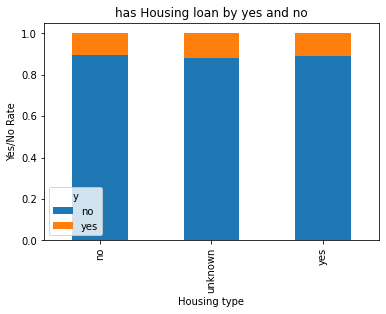

In [201]:
housing  = pd.crosstab(df['housing'], df['y'])
# Normalize the cross tab to sum to 1:
housing_t = housing.div(housing.sum(1).astype(float), axis=0)

housing_t.plot(kind='bar', 
                   stacked=True, 
                   title='has Housing loan by yes and no')
plt.xlabel('Housing type')
plt.ylabel('Yes/No Rate')

## feature : Job

Text(0, 0.5, &#39;Yes/No Rate&#39;)

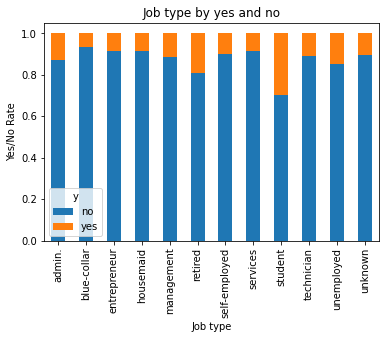

In [202]:
job = pd.crosstab(df['job'], df['y'])
# Normalize the cross tab to sum to 1:
job_t = job.div(job.sum(1).astype(float), axis=0)

job_t.plot(kind='bar', 
                   stacked=True, 
                   title='Job type by yes and no')
plt.xlabel('Job type')
plt.ylabel('Yes/No Rate')

### feature : day of week

Text(0, 0.5, &#39;Yes/No Rate&#39;)

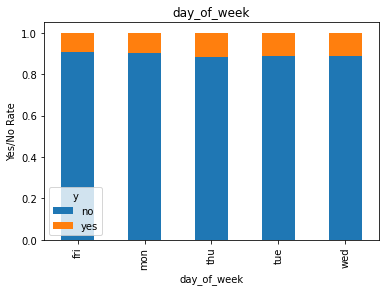

In [203]:

dow = pd.crosstab(df['day_of_week'], df['y'])
# Normalize the cross tab to sum to 1:
dow_t = dow.div(dow.sum(1).astype(float), axis=0)

dow_t.plot(kind='bar', 
                   stacked=True, 
                   title='day_of_week')
plt.xlabel('day_of_week')
plt.ylabel('Yes/No Rate')

#we can drop this column as this is not adding much to the model

## feature : Loan

Text(0, 0.5, &#39;Yes/No Rate&#39;)

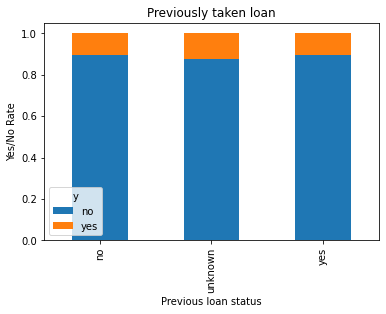

In [204]:
loan = pd.crosstab(df['loan'], df['y'])
# Normalize the cross tab to sum to 1:
loan_t = loan.div(loan.sum(1).astype(float), axis=0)

loan_t.plot(kind='bar', 
                   stacked=True, 
                   title='Previously taken loan')
plt.xlabel('Previous loan status')
plt.ylabel('Yes/No Rate')

#we can drop this also as this is not generating enough to be added to model

### feature : Month

Text(0, 0.5, &#39;Yes/No Rate&#39;)

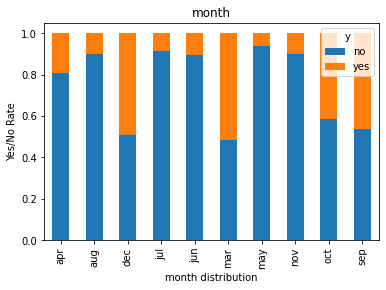

In [205]:
month = pd.crosstab(df['month'], df['y'])
# Normalize the cross tab to sum to 1:
month_t = month.div(month.sum(1).astype(float), axis=0)

month_t.plot(kind='bar', 
                   stacked=True, 
                   title='month')
plt.xlabel('month distribution')
plt.ylabel('Yes/No Rate')

### feature : poutcome

Text(0, 0.5, &#39;Yes/No Rate&#39;)

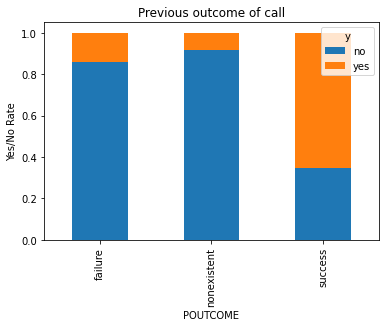

In [206]:
po = pd.crosstab(df['poutcome'], df['y'])
# Normalize the cross tab to sum to 1:
po_t = po.div(po.sum(1).astype(float), axis=0)

po_t.plot(kind='bar', 
                   stacked=True, 
                   title='Previous outcome of call')
plt.xlabel('POUTCOME')
plt.ylabel('Yes/No Rate')

### feature : default

Text(0, 0.5, &#39;Yes/No Rate&#39;)

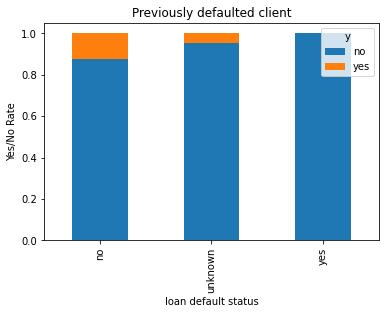

In [207]:
default = pd.crosstab(df['default'], df['y'])
# Normalize the cross tab to sum to 1:
default_t = default.div(default.sum(1).astype(float), axis=0)

default_t.plot(kind='bar', 
                   stacked=True, 
                   title='Previously defaulted client')
plt.xlabel('loan default status')
plt.ylabel('Yes/No Rate')

### feature: contact

Text(0, 0.5, &#39;Yes/No Rate&#39;)

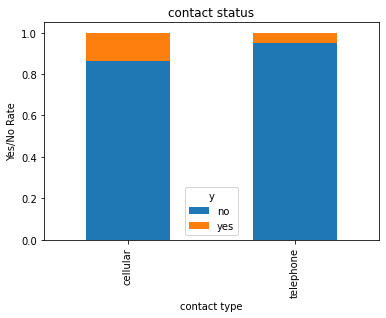

In [208]:
con = pd.crosstab(df['contact'], df['y'])
# Normalize the cross tab to sum to 1:
con_t = con.div(con.sum(1).astype(float), axis=0)

con_t.plot(kind='bar', 
                   stacked=True, 
                   title='contact status')
plt.xlabel('contact type')
plt.ylabel('Yes/No Rate')

### feature : education

Text(0, 0.5, &#39;Yes/No Rate&#39;)

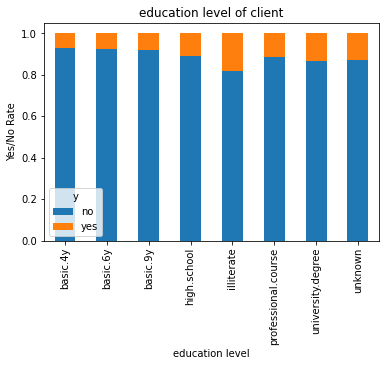

In [209]:
edu = pd.crosstab(df['education'], df['y'])
# Normalize the cross tab to sum to 1:
edu_t = edu.div(edu.sum(1).astype(float), axis=0)

edu_t.plot(kind='bar', 
                   stacked=True, 
                   title='education level of client')
plt.xlabel('education level')
plt.ylabel('Yes/No Rate')

## Corelation matrix : All numerical features

Index([&#39;age&#39;, &#39;job&#39;, &#39;marital&#39;, &#39;education&#39;, &#39;default&#39;, &#39;housing&#39;, &#39;loan&#39;,
       &#39;contact&#39;, &#39;month&#39;, &#39;day_of_week&#39;, &#39;duration&#39;, &#39;campaign&#39;, &#39;pdays&#39;,
       &#39;previous&#39;, &#39;poutcome&#39;, &#39;emp.var.rate&#39;, &#39;cons.price.idx&#39;,
       &#39;cons.conf.idx&#39;, &#39;euribor3m&#39;, &#39;nr.employed&#39;, &#39;y&#39;],
      dtype=&#39;object&#39;)

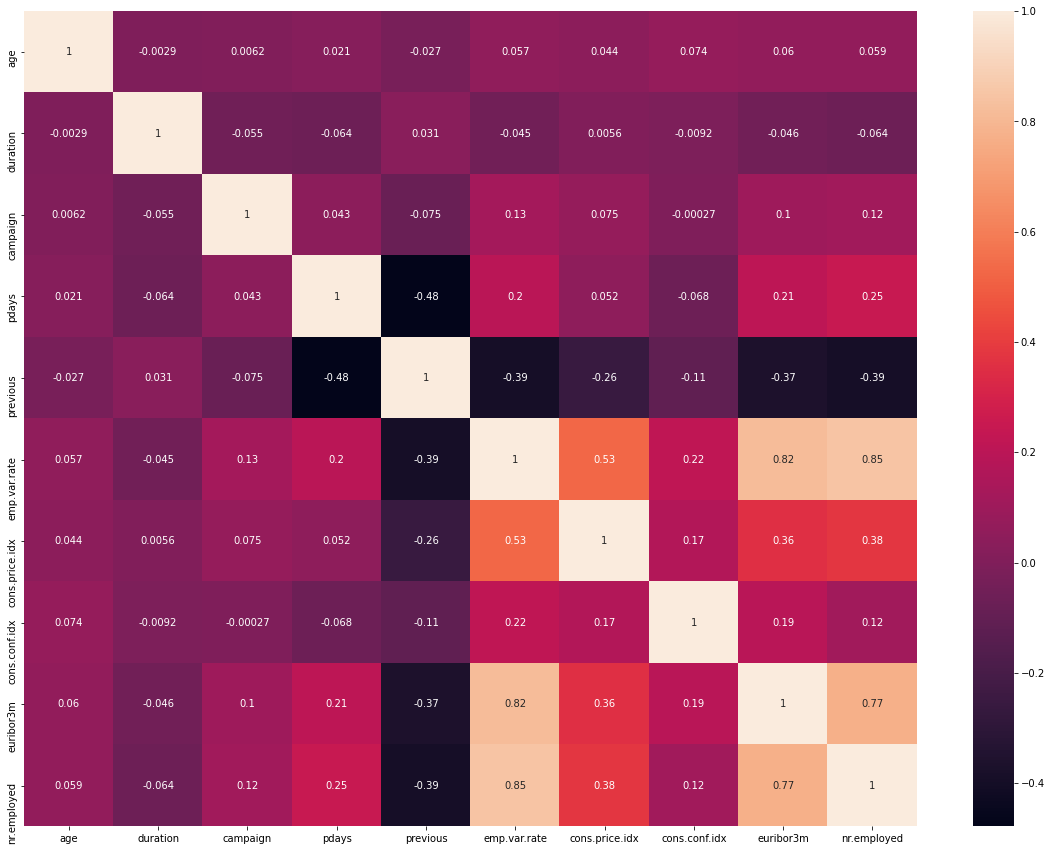

In [210]:
corr = df[["age","duration","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]].corr(method='kendall')
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
df.columns

### we can see some features are hihgliy positively correlated with each other like nr.employed and emp.var.rate and 

### feature:campaign

In [211]:
df['campaign'].describe()

count    20360.000000
mean         2.588949
std          2.858372
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

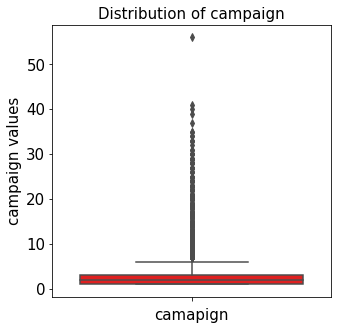

In [212]:
### we can see above that there are some outliers in the campaign field
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
sns.boxplot(x = 'campaign', data = df, orient = 'v', ax = ax1,color='red')
ax1.set_xlabel('camapign', fontsize=15)
ax1.set_ylabel('campaign values', fontsize=15)
ax1.set_title('Distribution of campaign', fontsize=15)
ax1.tick_params(labelsize=15)

### feature : pdays

In [213]:
df['pdays'].describe()

count    20360.000000
mean       965.991601
std        177.987746
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [214]:
df['previous'].describe()

count    20360.000000
mean         0.168222
std          0.484387
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: previous, dtype: float64

In [215]:
df['emp.var.rate'].describe()

count    20360.000000
mean         0.109479
std          1.554051
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [216]:
df['cons.price.idx'].describe()

count    20360.000000
mean        93.579891
std          0.574459
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

In [217]:
df['cons.conf.idx'].describe()

count    20360.000000
mean       -40.557642
std          4.563615
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [218]:
df['euribor3m'].describe()

count    20360.000000
mean         3.678060
std          1.708043
min          0.634000
25%          1.365000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [219]:
df['nr.employed'].describe()

count    20360.000000
mean      5168.727417
std         70.908803
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

Text(0.5, 1.0, &#39;euribor3m Histogram&#39;)

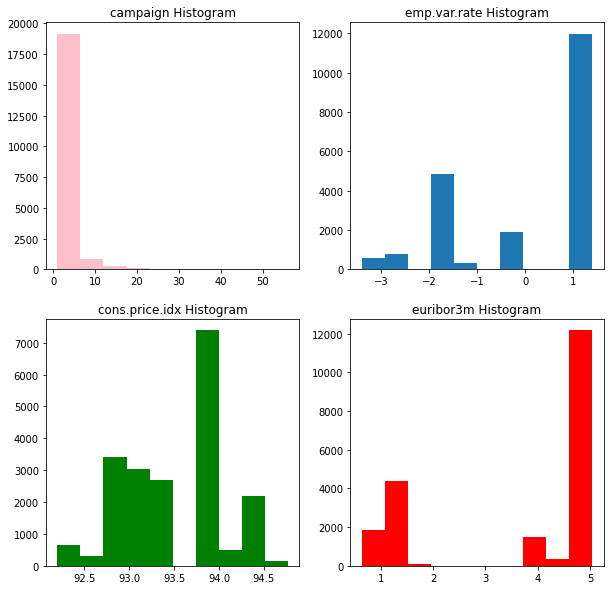

In [220]:
# Set up a grid of plots
fig = plt.figure(figsize=(10,10)) 
fig_dims = (2, 2)

#plt.xticks(rotation=0)

# Plot the Price histogram
plt.subplot2grid(fig_dims, (0, 0))
df['campaign'].hist(grid = False,color='pink')
plt.title('campaign Histogram')

# Plot sqaure feet histogram
plt.subplot2grid(fig_dims, (0, 1))
df['emp.var.rate'].hist(grid = False)
plt.title('emp.var.rate Histogram')

# Plot $/square feet histogram
plt.subplot2grid(fig_dims, (1, 0))
df['cons.price.idx'].hist(grid = False,color='green')
plt.title('cons.price.idx Histogram')

# Plot days on market histogram
plt.subplot2grid(fig_dims, (1, 1))
df['euribor3m'].hist(grid = False,color= 'Red')
plt.title('euribor3m Histogram')

## final data preparation for MODELS

## there are 9 categorical columns and we have process them accordingly for coverting them to numerical values using One hot Encoding or direct Mapping 

## based on analysis of data performed previously we will drop some columns

In [221]:
# Dropping duration for the modelling purpose as duration is knows after the call only
# we can drop emp.var.rate as it is highly correlated with nr.employeed
# Housing , day_of_week and loan attributes can be removed 

# First dropping columns from our main data set
ls=['day_of_week','housing','loan','emp.var.rate']
for j in ls:
    df.drop(j,inplace=True,axis=1)

In [222]:
# let check the unique values in each categorical column
cat_col=['job', 'marital', 'education', 'default', 
       'contact', 'month','poutcome']
for r in cat_col:
    print("type of %s -->"%r,df[r].unique(),'\n')

type of job --&gt; [&#39;blue-collar&#39; &#39;admin.&#39; &#39;technician&#39; &#39;retired&#39; &#39;management&#39; &#39;services&#39;
 &#39;housemaid&#39; &#39;unknown&#39; &#39;student&#39; &#39;self-employed&#39; &#39;entrepreneur&#39;
 &#39;unemployed&#39;] 

type of marital --&gt; [&#39;married&#39; &#39;divorced&#39; &#39;single&#39; &#39;unknown&#39;] 

type of education --&gt; [&#39;basic.9y&#39; &#39;high.school&#39; &#39;university.degree&#39; &#39;professional.course&#39;
 &#39;unknown&#39; &#39;basic.6y&#39; &#39;basic.4y&#39; &#39;illiterate&#39;] 

type of default --&gt; [&#39;no&#39; &#39;unknown&#39; &#39;yes&#39;] 

type of contact --&gt; [&#39;telephone&#39; &#39;cellular&#39;] 

type of month --&gt; [&#39;may&#39; &#39;aug&#39; &#39;jul&#39; &#39;mar&#39; &#39;nov&#39; &#39;apr&#39; &#39;jun&#39; &#39;oct&#39; &#39;dec&#39; &#39;sep&#39;] 

type of poutcome --&gt; [&#39;nonexistent&#39; &#39;failure&#39; &#39;success&#39;] 



## JOB 

In [223]:
df['job'].value_counts()

admin.           5496
blue-collar      4574
technician       3317
services         1921
management       1460
entrepreneur      704
self-employed     702
retired           604
unemployed        511
housemaid         508
student           401
unknown           162
Name: job, dtype: int64

In [224]:
#using one hot enconding with Job as they are not related to each other
cols = pd.get_dummies(df['job'], prefix= 'job')
df[cols.columns] = cols
df.drop('job', axis = 1, inplace = True)

## MARITAL STATUS


In [225]:
df['marital'].value_counts()

married     12451
single       5668
divorced     2198
unknown        43
Name: marital, dtype: int64

In [226]:
#using one hot enconding with marital status as they are not related to each other
cols = pd.get_dummies(df['marital'], prefix= 'MS')
df[cols.columns] = cols
df.drop('marital', axis = 1, inplace = True)

## Education level

In [227]:
df['education'].value_counts()

university.degree      6055
high.school            4708
basic.9y               2982
professional.course    2677
basic.4y               1906
basic.6y               1161
unknown                 860
illiterate               11
Name: education, dtype: int64

In [228]:
# we can map them directly as they are related to each other in levels
df['education'] = df['education'].map({'basic.9y':4 ,'high.school':5 ,'university.degree':7, 'professional.course':6,
 'unknown':0 ,'basic.6y':3 ,'basic.4y':2 ,'illiterate':1}).astype(int)

## DEFAULT

In [229]:
df['default'].value_counts()

no         16097
unknown     4260
yes            3
Name: default, dtype: int64

In [230]:
#using one hot enconding with deault laon column as they are not related to each other
cols = pd.get_dummies(df['default'], prefix= 'df')
df[cols.columns] = cols
df.drop('default', axis = 1, inplace = True)

## type of contact information available

In [231]:
df['contact'].value_counts()

cellular     12881
telephone     7479
Name: contact, dtype: int64

In [232]:
# we can map them directly as they are related to each other in levels
df['contact'] = df['contact'].map({'telephone':0 ,'cellular':1}).astype(int)

## MONTH COLUMN

In [233]:
df['month'].value_counts()

may    6854
jul    3545
aug    3032
jun    2661
nov    2090
apr    1267
oct     312
sep     271
mar     245
dec      83
Name: month, dtype: int64

In [234]:
#using one hot enconding with month column as they are not related to each other
cols = pd.get_dummies(df['month'], prefix= 'month')
df[cols.columns] = cols
df.drop('month', axis = 1, inplace = True)

## previous outcome

In [235]:
df['poutcome'].value_counts()

nonexistent    17623
failure         2132
success          605
Name: poutcome, dtype: int64

In [236]:
#using one hot enconding with poutcome column as they are not related to each other
cols = pd.get_dummies(df['poutcome'], prefix= 'po')
df[cols.columns] = cols
df.drop('poutcome', axis = 1, inplace = True)

In [237]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 20360 entries, 0 to 20593
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                20360 non-null  int64  
 1   education          20360 non-null  int32  
 2   contact            20360 non-null  int32  
 3   duration           20360 non-null  int64  
 4   campaign           20360 non-null  int64  
 5   pdays              20360 non-null  int64  
 6   previous           20360 non-null  int64  
 7   cons.price.idx     20360 non-null  float64
 8   cons.conf.idx      20360 non-null  float64
 9   euribor3m          20360 non-null  float64
 10  nr.employed        20360 non-null  float64
 11  y                  20360 non-null  object 
 12  job_admin.         20360 non-null  uint8  
 13  job_blue-collar    20360 non-null  uint8  
 14  job_entrepreneur   20360 non-null  uint8  
 15  job_housemaid      20360 non-null  uint8  
 16  job_mana

## TARGET VARIABLE

In [238]:
df['y'].value_counts()

no     18182
yes     2178
Name: y, dtype: int64

In [239]:
# we can map them directly as they are related to each other in levels
df['y'] = df['y'].map({'no':0 ,'yes':1}).astype(int)

In [240]:
df.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
Int64Index: 20360 entries, 0 to 20593
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                20360 non-null  int64  
 1   education          20360 non-null  int32  
 2   contact            20360 non-null  int32  
 3   duration           20360 non-null  int64  
 4   campaign           20360 non-null  int64  
 5   pdays              20360 non-null  int64  
 6   previous           20360 non-null  int64  
 7   cons.price.idx     20360 non-null  float64
 8   cons.conf.idx      20360 non-null  float64
 9   euribor3m          20360 non-null  float64
 10  nr.employed        20360 non-null  float64
 11  y                  20360 non-null  int32  
 12  job_admin.         20360 non-null  uint8  
 13  job_blue-collar    20360 non-null  uint8  
 14  job_entrepreneur   20360 non-null  uint8  
 15  job_housemaid      20360 non-null  uint8  
 16  job_mana

# MODELLING

## y is the target variable

In [241]:
X=df.drop(['y'],axis=1)
y=df['y']

In [242]:
X.shape

(20360, 43)

In [243]:
y.shape

(20360,)

## SPLITING THE DATA

In [244]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

print("Training dataset size: "+str(len(X_train)))
print("Test dataset size: "+str(len(X_test)))

Training dataset size: 14252
Test dataset size: 6108


## Models
### Importing modeules from sklearn

In [245]:
import sklearn
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [246]:
# Building and evaluating classification models basic models
models =[]
models.append(('LogR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('L_SVC', LinearSVC()))
models.append(('SVM_linear', SVC(kernel='linear')))
models.append(('SVM_rbf', SVC(kernel='rbf')))
models.append(('SVM_poly', SVC(kernel='poly')))
models.append(('DTC', DecisionTreeClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogR: 0.911731 (0.006862)
KNN: 0.899031 (0.008032)
L_SVC: 0.911941 (0.007660)
SVM_linear: 0.904504 (0.008549)
SVM_rbf: 0.905486 (0.006932)
SVM_poly: 0.906188 (0.006940)
DTC: 0.894400 (0.006512)


## Logistic Regression

In [248]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.9099541584806811
AUC: 0.9276895254056109
Confusion Matrix: [[5327  108]
 [ 442  231]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5435
           1       0.68      0.34      0.46       673

    accuracy                           0.91      6108
   macro avg       0.80      0.66      0.70      6108
weighted avg       0.90      0.91      0.90      6108



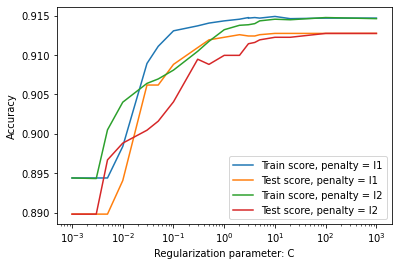

In [250]:
import matplotlib.pyplot as plt
%matplotlib inline

c_range = [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20,100,1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c,solver='liblinear')
    log_l2 = LogisticRegression(penalty = 'l2', C = c,solver='lbfgs')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))
    
    
plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [ ]:
# applying gridsearch to find the best parameter

In [251]:
logreg = LogisticRegression(class_weight='balanced')
param1 = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20,100,1000]}
clf1 = GridSearchCV(logreg,param1,scoring='roc_auc',refit=True,cv=5)
clf1.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf1.best_score_, clf1.best_params_))

Best roc_auc: 0.9356, with best C: {&#39;C&#39;: 1000}


In [252]:
y_pred = clf1.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.8652586771447283
[[4706  729]
 [  94  579]]
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      5435
           1       0.44      0.86      0.58       673

    accuracy                           0.87      6108
   macro avg       0.71      0.86      0.75      6108
weighted avg       0.92      0.87      0.88      6108



## KNN classifier

In [254]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.8968565815324165
AUC: 0.789564910717093
Confusion Matrix: [[5300  135]
 [ 495  178]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5435
           1       0.57      0.26      0.36       673

    accuracy                           0.90      6108
   macro avg       0.74      0.62      0.65      6108
weighted avg       0.88      0.90      0.88      6108



Text(0, 0.5, &#39;Accuracy&#39;)

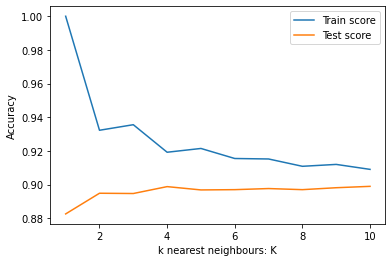

In [255]:
k_range = list(range(1, 11))
train_score_knn = []
test_score_knn = []

for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    train_score_knn.append(neigh.score(X_train, y_train))
    test_score_knn.append(neigh.score(X_test, y_test))
    
plt.plot(k_range, train_score_knn, label = 'Train score')
plt.plot(k_range, test_score_knn, label = 'Test score')
plt.legend()
plt.xlabel('k nearest neighbours: K')
plt.ylabel('Accuracy')

In [259]:
k_range = list(range(1, 11))
knn = KNeighborsClassifier()
param2 = dict(n_neighbors=k_range)
clf2 = GridSearchCV(knn, param2,'roc_auc',refit=True,cv=3)
clf2.fit(X_train,y_train)
print('roc_auc: {:.4}, with best C: {}'.format(clf2.best_score_, clf2.best_params_))

roc_auc: 0.7952, with best C: {&#39;n_neighbors&#39;: 10}


In [260]:
y_pred = clf2.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8989849377865095
[[5370   65]
 [ 552  121]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5435
           1       0.65      0.18      0.28       673

    accuracy                           0.90      6108
   macro avg       0.78      0.58      0.61      6108
weighted avg       0.88      0.90      0.87      6108



## Linear SVM

In [305]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
predictions = lsvc.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.9076620825147348
Confusion Matrix: [[5326  109]
 [ 455  218]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5435
           1       0.67      0.32      0.44       673

    accuracy                           0.91      6108
   macro avg       0.79      0.65      0.69      6108
weighted avg       0.89      0.91      0.89      6108



In [262]:
param4 = {"C": [0.01, 0.1, 1.0]}
lsvc = LinearSVC()
clf4 = GridSearchCV(lsvc, param4,'roc_auc',refit=True,cv=3)
clf4.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf4.best_score_, clf4.best_params_))

Best roc_auc: 0.9318, with best C: {&#39;C&#39;: 1.0}


In [263]:
y_pred = clf4.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9076620825147348
[[5326  109]
 [ 455  218]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5435
           1       0.67      0.32      0.44       673

    accuracy                           0.91      6108
   macro avg       0.79      0.65      0.69      6108
weighted avg       0.89      0.91      0.89      6108



## SVM with Linear Kernel

In [265]:
SVC_linear = SVC(kernel='linear', probability=True)
SVC_linear.fit(X_train, y_train)
predictions = SVC_linear.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, SVC_linear.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.9022593320235757
AUC: 0.9290067268037362
Confusion Matrix: [[5366   69]
 [ 528  145]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5435
           1       0.68      0.22      0.33       673

    accuracy                           0.90      6108
   macro avg       0.79      0.60      0.64      6108
weighted avg       0.88      0.90      0.88      6108



In [266]:
param3 = {'C':[0.1, 1, 10],'gamma':[0.1, 1, 10], 'kernel':['linear']}
svc = SVC()
clf3 = GridSearchCV(svc, param3,'roc_auc',refit=True,cv=3)
clf3.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf3.best_score_, clf3.best_params_))

Best roc_auc: 0.9305, with best C: {&#39;C&#39;: 10, &#39;gamma&#39;: 0.1, &#39;kernel&#39;: &#39;linear&#39;}


In [267]:
y_pred = clf3.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9034053700065487
[[5345   90]
 [ 500  173]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      5435
           1       0.66      0.26      0.37       673

    accuracy                           0.90      6108
   macro avg       0.79      0.62      0.66      6108
weighted avg       0.89      0.90      0.88      6108



## SVM with RBF kernel

In [268]:
SVC_rbf = SVC(kernel='rbf', probability=True)
SVC_rbf.fit(X_train, y_train)
predictions = SVC_rbf.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, SVC_rbf.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.9017681728880157
AUC: 0.922576006320817
Confusion Matrix: [[5393   42]
 [ 558  115]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5435
           1       0.73      0.17      0.28       673

    accuracy                           0.90      6108
   macro avg       0.82      0.58      0.61      6108
weighted avg       0.89      0.90      0.87      6108



In [269]:
param_rbf = {'C':[0.1, 1, 10],'gamma':[0.1, 1, 10], 'kernel':['rbf']}
svc = SVC()
clf_rbf = GridSearchCV(svc, param_rbf,'roc_auc',refit=True,cv=3)
clf_rbf.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf_rbf.best_score_, clf_rbf.best_params_))

Best roc_auc: 0.9165, with best C: {&#39;C&#39;: 1, &#39;gamma&#39;: 0.1, &#39;kernel&#39;: &#39;rbf&#39;}


In [270]:
y_pred = clf_rbf.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9004584151931893
[[5391   44]
 [ 564  109]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5435
           1       0.71      0.16      0.26       673

    accuracy                           0.90      6108
   macro avg       0.81      0.58      0.61      6108
weighted avg       0.88      0.90      0.87      6108



## SVM with Poly Kernel

In [272]:
SVC_poly = SVC(kernel='poly', probability=True)
SVC_poly.fit(X_train, y_train)
predictions = SVC_poly.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, SVC_poly.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.9029142108709889
AUC: 0.9228502182349556
Confusion Matrix: [[5360   75]
 [ 518  155]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5435
           1       0.67      0.23      0.34       673

    accuracy                           0.90      6108
   macro avg       0.79      0.61      0.65      6108
weighted avg       0.89      0.90      0.88      6108



In [274]:
param_poly = {'C':[0.1,1],'gamma':[0.1, 1], 'kernel':['poly']}
svc = SVC()
clf_poly = GridSearchCV(svc, param_poly,'roc_auc',refit=True,cv=3)
clf_poly.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf_poly.best_score_, clf_poly.best_params_))

Best roc_auc: 0.9125, with best C: {&#39;C&#39;: 1, &#39;gamma&#39;: 0.1, &#39;kernel&#39;: &#39;poly&#39;}


In [275]:
y_pred = clf_poly.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9011132940406025
[[5394   41]
 [ 563  110]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      5435
           1       0.73      0.16      0.27       673

    accuracy                           0.90      6108
   macro avg       0.82      0.58      0.61      6108
weighted avg       0.89      0.90      0.87      6108



## decisionTreeClassifier()

In [277]:
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)
predictions = dct.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: "+ str(roc_auc_score(y_test, dct.predict_proba(X_test)[:,1])))
print("Confusion Matrix: "+ str(confusion_matrix(y_test, predictions)))
print(classification_report(y_test, predictions))

Accuracy: 0.8898166339227243
AUC: 0.7102554709104355
Confusion Matrix: [[5112  323]
 [ 350  323]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5435
           1       0.50      0.48      0.49       673

    accuracy                           0.89      6108
   macro avg       0.72      0.71      0.71      6108
weighted avg       0.89      0.89      0.89      6108



In [279]:
param5 = {'max_depth': [1,3, 5, 7, 10,20]}
clf5 = GridSearchCV(DecisionTreeClassifier(), param5,'roc_auc',refit=True,cv=3)
clf5.fit(X_train,y_train)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf5.best_score_, clf5.best_params_))

Best roc_auc: 0.909, with best C: {&#39;max_depth&#39;: 5}


In [300]:
import graphviz 
from sklearn import tree
dct1=DecisionTreeClassifier(max_depth=5)
dct1.fit(X=X_train, y=y_train)


DecisionTreeClassifier(max_depth=5)

In [301]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=1080)
tree.plot_tree(dct1,
               feature_names =X.columns,class_names=str(y.unique()),
               filled = True);


In [302]:
y_pred = clf5.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9096267190569745
[[5255  180]
 [ 372  301]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5435
           1       0.63      0.45      0.52       673

    accuracy                           0.91      6108
   macro avg       0.78      0.71      0.74      6108
weighted avg       0.90      0.91      0.90      6108



# Conclusion
We have used AUC for evaluation rather Accuracy because - 
When we use accuracy, we assign equal cost to false positives and false negatives. When that data set is imbalanced - say it has 99% of instances in one class and only 1 % in the other - there is a great way to lower the cost. But as our data set is highly imbalaced so models should not be evaluated based on accuracy here.
AUC has been used for model evaluation as it considers trade-off between True positive and true negatives. Models with high AUC can detect a large amount of true positives without losing its ability to detect true negatives and vice-versa.

After comparing the performance of all models in training and testing datasets, we see that basic Logistic regression model gave better performance w.r.t all the other models as it has the highest AUC value. 

Logistic regularization with Inverse regularization parameter (C = 20) improved the results for classifying the people with salary (>50K). 

Overall for this dataset the models that took less time for building, predicting and model which is easy to explain (Logistic regression and cross validated Decision tree) performed far more superior compared to the complex models (SVM with kernels). 
    
### Best Parameters for every model 
| Model | Params |
| --- | --- |
| Logistic regression | C = 1000 |
| KNN Classification | n = 10 |
| Linear SVC | C = 1.0 | 
| SVM Linear Kernel | C = 10, gamma = 0.1 |
| SVM RBF Kernel | C = 1, gamma = 0.1 |
| SVM Poly Kernel | C = 1, gamma = 0.1 |
| Decision Tree | max_depth = 5 |


### Performance in testing Dataset
| Model | Logistic Regression | Logistic Regression | KNN Classification | KNN | Linear SVC| Linear SVC | SVM Linear | SVM Linear | SVM RBF | SVM RBF | SVM Poly | SVM Poly | Decision tree | Decision Tree |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Params | default | C = 1000 | default | n=10 | default | C = 1.0 | default | C=10, gamma=0.1 | default | C=1,gamma=0.1 | default | C=1, gamma=0.1| default | max_depth = 5 |
| Accuracy | 0.91 | 0.87 | 0.89| 0.90 | 0.91 | 0.91 | 0.90 | 0.90 | 0.90 | 0.90 | 0.90| 0.90 | 0.89 | 0.91 |
|F1-score(0)|0.95| 0.92 | 0.94| 0.95 | 0.95 | 0.95 | 0.95 | 0.95 | 0.95 | 0.95 | 0.95 | 0.95 | 0.94 | 0.95 |
|F1-score(1)|0.46| 0.58 | 0.36| 0.28 | 0.44 | 0.44 | 0.33 | 0.37 | 0.28 | 0.26 | 0.34 | 0.26 | 0.49 | 0.52 |
| AUC | 0.91 | 0.927 | 0.789 | 0.795 | -- | 0.931 | 0.929 | 0.93 | 0.922 | 0.916 | 0.922 | 0.916 | 0.71  | 0.909 |


In [ ]:
## Logistic Regression with default parameters - This is selected to be the best model

In [303]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Accuracy: "+ str(accuracy_score(y_test, predictions)))
print("AUC: ", (roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])))
print("Confusion Matrix: ", confusion_matrix(y_test, predictions), sep = '\n')
print(classification_report(y_test, predictions))

Accuracy: 0.9099541584806811
AUC:  0.9276895254056109
Confusion Matrix: 
[[5327  108]
 [ 442  231]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5435
           1       0.68      0.34      0.46       673

    accuracy                           0.91      6108
   macro avg       0.80      0.66      0.70      6108
weighted avg       0.90      0.91      0.90      6108

